<a href="https://colab.research.google.com/github/SilahicAmil/NLP/blob/main/Cyberbullying_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cyberbullying Sentiment Analysis

In [52]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Tensorflow
import tensorflow as tf

# Keras
import keras
from keras.layers import Embedding, TextVectorization
from keras.metrics import categorical_accuracy

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [3]:
full_data = pd.read_csv("/content/drive/MyDrive/Random_Sentiment_Analysis/cyberbullying_tweets.csv")
full_data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [4]:
full_data.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

# Shuffle Data

In [5]:
shuffled_data = full_data.sample(frac=1, random_state=42)
shuffled_data.head()

,tweet_text,cyberbullying_type
40362,@Goree_JuhssGuns hahaha he ain't even worth my...,ethnicity
15019,RT @hsaymssik: Sucks to have the smile wiped o...,gender
46321,"Just a reminder, it's absolutely disgusting to...",ethnicity
23927,RT @BuzzFeedUK: When you accidentally open you...,other_cyberbullying
1640,Loving the look of the fritters! #mkr,not_cyberbullying


# Train Test Val Splitting

In [6]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(shuffled_data["tweet_text"].to_numpy(),
                                                                              shuffled_data["cyberbullying_type"].to_numpy(),
                                                                              test_size=0.2,
                                                                              random_state=42)

In [8]:
len(train_sentences), len(test_sentences)

(38153, 9539)

In [60]:
# Val set
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_sentences,
                                                                            train_labels,
                                                                            test_size=0.10,
                                                                            random_state=42)

In [61]:
len(val_sentences), len(train_sentences)

(3434, 30903)

# One Hot Encoding

In [62]:
one_hot = OneHotEncoder(sparse=True)

train_labels_one_hot = one_hot.fit_transform(train_labels.reshape(-1, 1))
test_labels_one_hot = one_hot.fit_transform(test_labels.reshape(-1, 1))
val_labels_one_hot = one_hot.fit_transform(val_labels.reshape(-1, 1))

# Label Encoding

In [63]:
label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.fit_transform(test_labels)
val_labels_encoded = label_encoder.fit_transform(val_labels)

In [66]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

num_classes, class_names

(6, array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
        'other_cyberbullying', 'religion'], dtype=object))

# Vectorization Prep

In [27]:
sent_lens = [len(i.split()) for i in train_sentences]
sent_len[:5]

[5, 23, 50, 14, 20]

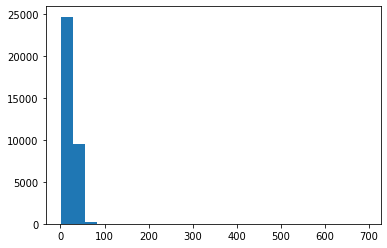

In [32]:
plt.hist(sent_lens, bins=25);

In [40]:
MAX_SENT_LEN = int(np.percentile(sent_lens, 99))
MAX_SENT_LEN

56

# Text Vectorization

In [49]:
MAX_VOCAB_LEN = 60_000


txt_vect = TextVectorization(max_tokens=MAX_VOCAB_LEN,
                             output_mode="int",
                             pad_to_max_tokens=True,
                             output_sequence_length=MAX_SENT_LEN)

In [50]:
txt_vect.adapt(train_sentences)

In [51]:
# Vocab len

vocab_len = txt_vect.get_vocabulary()
print(len(vocab_len))

55992


# Calc Results Function

In [53]:
def calc_result(y_true, y_pred):


  model_accuracy = accuracy_score(y_true, y_pred) * 100

  model_precision, model_recall, model_f1 = precision_recall_fscore_support(y_true, y_pred, average="weighted")

  results = {"Accuracy": model_accuracy,
             "Precision": model_precision,
             "Recall": model_recall,
             "F1": model_f1}
  return results

In [55]:
def compile_model(model):
  model.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])
  
def fit_model(model, epochs):
  model.fit(train_dataset,
            epochs=epochs,
            validation_data=val_dataset)